movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64
userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


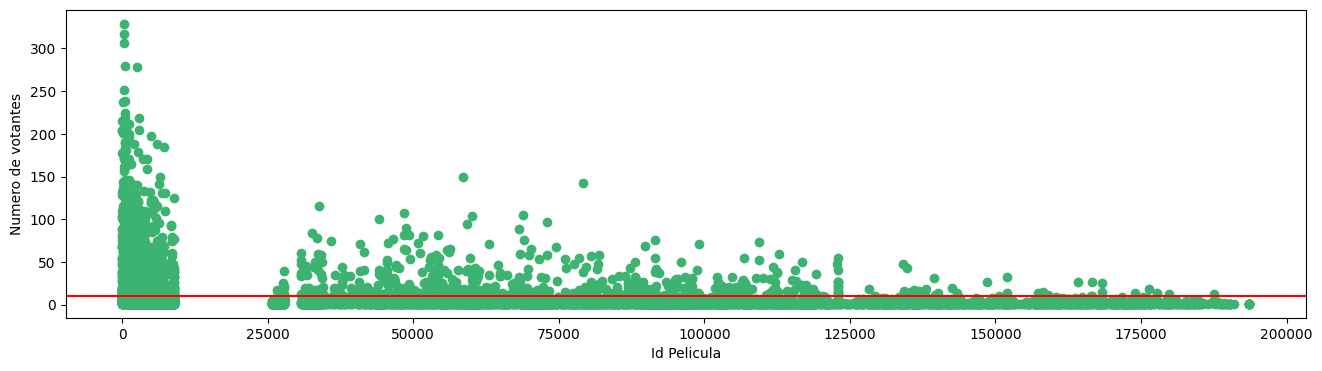

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# Combinar datasets 
data = pd.merge(ratings, movies, on='movieId')

# Eliminar columnas innecesarias
data.drop("timestamp", axis=1, inplace=True)

# Pivotear la tabla
pivoted_data = data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

# Obtener numero de usuarios que han votado por pelicula
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')

print(no_user_voted)

# Obtener numero de peliculas votadas por usuario
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

print(no_movies_voted)

# Eliminar datasets que ya no se requieran
del movies
del ratings

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('Id Pelicula')
plt.ylabel('Numero de votantes')
plt.show()

pivoted_data

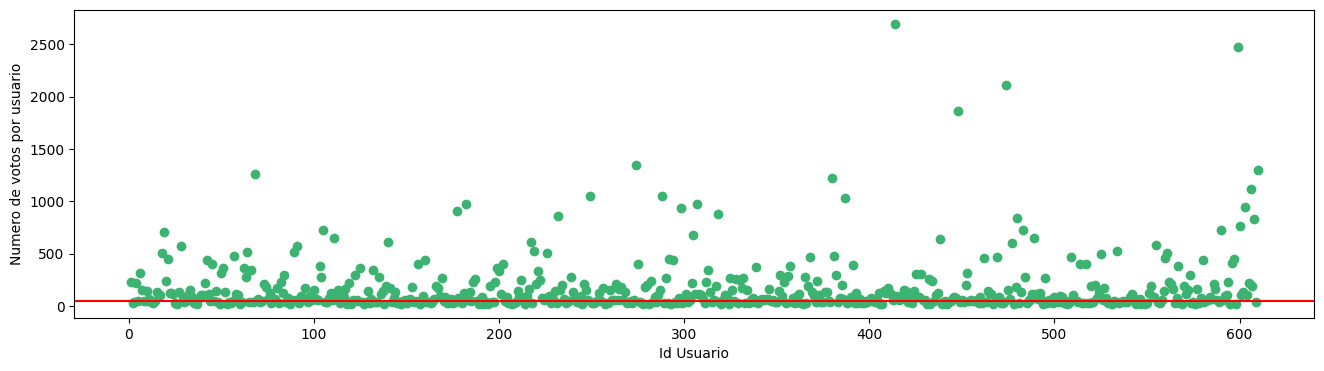

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
# Excluir peliculas que no han sido por lo menos votadas 10 veces
pivoted_data = pivoted_data.loc[no_user_voted[no_user_voted > 10].index,:]

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('Id Usuario')
plt.ylabel('Numero de votos por usuario')
plt.show()

# Excluir usuarios que por lo menos no han votado 50 veces
pivoted_data=pivoted_data.loc[:,no_movies_voted[no_movies_voted > 50].index]

#Limpiar datasets que ya no se requieran
del no_movies_voted
del no_user_voted

pivoted_data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

# Definir características
X = pivoted_data.values # N variables independientes (calificaciones por usuarioId)

print("Variables independientes (userId): ")
print(X)

y = np.array([data[data['movieId'] == movie_id]['rating'].mean() for movie_id in pivoted_data.index])  # Variable objetivo

print("Variable dependiente (media del rating por pelicula): ")
print(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)



Variables independientes (userId): 
[[4.  0.  0.  ... 4.  2.5 5. ]
 [0.  0.  4.  ... 0.  2.  0. ]
 [4.  0.  5.  ... 0.  2.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
Variable dependiente (media del rating por pelicula): 
[3.92093023 3.43181818 3.25961538 ... 3.53846154 3.125      3.875     ]


LinearRegression()

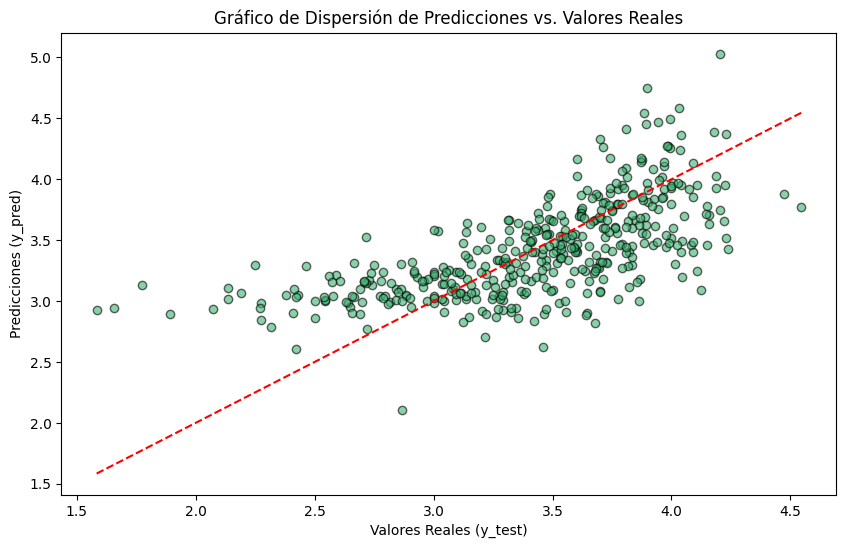

Precisión del modelo:  0.6072924073006689
Error cuadrático medio:  0.14762791149488375


In [4]:
# Predecir en el conjunto de prueba
predictions = model.predict(X_test)

# Crear el gráfico de dispersión de valores reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='mediumseagreen', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de y = x para referencia

# Añadir etiquetas y título
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.show()

# Precision del modelo
model_precision = model.score(X_train, y_train)

print("Precisión del modelo: ", model_precision)

# Error cuadratico medio

mse = mean_squared_error(y_test, predictions)
print('Error cuadrático medio: ',mse)

In [5]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import seaborn as sns

# Función para obtener recomendaciones combinadas
def get_combined_recommendations(movie_name):
    n_movies_to_recommend = 10
    
    # Filtrado colaborativo
    movie_list = data[data['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        
        # Filtrado colaborativo
        knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
        csr_data = csr_matrix(pivoted_data.values)
        knn.fit(csr_data)

        # Encontrar indice de la pelicula en el dataset
        movie_index = pivoted_data.index.get_loc(movie_idx)

        # Encontrar distancias y indices
        distances, indices = knn.kneighbors(csr_data[movie_index], n_neighbors=n_movies_to_recommend + 1)
        
        # Predicciones del modelo de regresión para películas recomendadas
        recommend_frame = []

        for i in range(1, len(distances[0])):
            neighbor_movie_id = pivoted_data.index[indices[0][i]]
            neighbor_data = pivoted_data.loc[neighbor_movie_id].values.reshape(1, -1)
            # Verifica que existan datos para el vecino recomendado
            if len(neighbor_data) > 0:
                # Predecir modelo tomando como base el vecino del filtrado colaborativo
                predicted_rating = model.predict(neighbor_data)
                
                # Obtener media del rating actual
                actual_ratings = data[data['movieId'] == neighbor_movie_id]['rating']
                actual_rating = actual_ratings.mean() if len(actual_ratings) > 0 else 0

                # Obtener margen de error del rating actual contra el rating predicho
                margin_of_error = actual_rating - predicted_rating.mean()
                recommend_frame.append({
                    'Id': data[data['movieId'] == neighbor_movie_id]['movieId'].values[0],
                    'Titulo': data[data['movieId'] == neighbor_movie_id]['title'].values[0],
                    'Genero': data[data['movieId'] == neighbor_movie_id]['genres'].values[0].split("|"),
                    'Distancia': distances[0][i],
                    'Predicción de Rating': predicted_rating.mean(),
                    'Calificación Media Real': actual_rating,
                    'Margen de Error': margin_of_error,
                    'Precisión del modelo': model_precision
                })
        
         # Convertir las recomendaciones a DataFrame
        df = pd.DataFrame(recommend_frame)

        # Ordenar por prediccion de rating
        sorted_df = df.sort_values(by='Predicción de Rating', ascending=False).head(n_movies_to_recommend)

        # Gráfico de margen de error
        plt.figure(figsize=(10, 6))
        sns.barplot(data=df, x='Titulo', y='Margen de Error', palette='coolwarm')
        plt.axhline(0, color='red', linestyle='--')  # Línea en y=0 para referencia
        plt.title('Margen de Error de las Predicciones por Película')
        plt.xlabel('Título de la Película')
        plt.ylabel('Margen de Error (Calificación Real - Predicción)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return sorted_df
    else:
        return "No hay peliculas encontradas. Intente nuevamente"

C:\Users\bruno\AppData\Local\Temp\ipykernel_15876\2844304531.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Titulo', y='Margen de Error', palette='coolwarm')


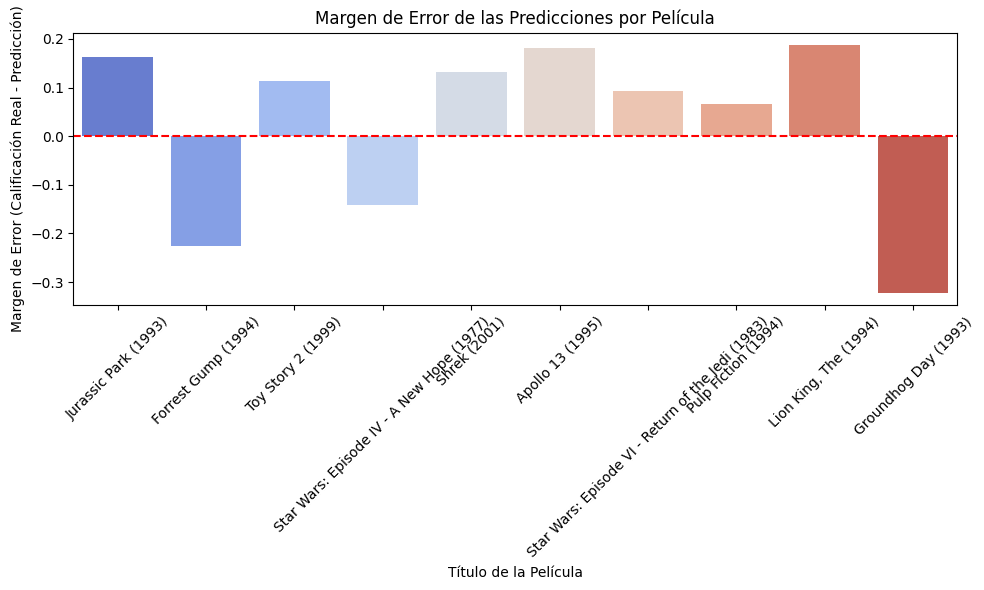

,Id,Titulo,Genero,Distancia,Predicción de Rating,Calificación Media Real,Margen de Error,Precisión del modelo
1,356,Forrest Gump (1994),"[Comedy, Drama, Romance, War]",0.356542,4.389183,4.164134,-0.225049,0.607292
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Sci-Fi]",0.380789,4.373185,4.231076,-0.142109,0.607292
9,1265,Groundhog Day (1993),"[Comedy, Fantasy, Romance]",0.399495,4.265597,3.944056,-0.321541,0.607292
7,296,Pulp Fiction (1994),"[Comedy, Crime, Drama, Thriller]",0.398293,4.130863,4.197068,0.066205,0.607292
6,1210,Star Wars: Episode VI - Return of the Jedi (1983),"[Action, Adventure, Sci-Fi]",0.390663,4.044258,4.137755,0.093497,0.607292
8,364,"Lion King, The (1994)","[Adventure, Animation, Children, Drama, Musica...",0.398578,3.754646,3.941860,0.187214,0.607292
2,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]",0.371637,3.747514,3.860825,0.113311,0.607292
4,4306,Shrek (2001),"[Adventure, Animation, Children, Comedy, Fanta...",0.381472,3.734589,3.867647,0.133059,0.607292
5,150,Apollo 13 (1995),"[Adventure, Drama, IMAX]",0.384633,3.664027,3.845771,0.181744,0.607292
0,480,Jurassic Park (1993),"[Action, Adventure, Sci-Fi, Thriller]",0.334884,3.586451,3.750000,0.163549,0.607292


In [6]:
# Obtener recomendaciones
recommendations = get_combined_recommendations('Toy Story')
recommendations